# Making a Neural Network for Classifying Handwritten Digits


## Importing libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU, Flatten
from keras.metrics import AUC
from keras import backend as K
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Splitting Data

https://deepai.org/datasets is good websites for datasets

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255


#for i in range(20):
 #   print(X_train[i])
  #  print(y_train[i])

## Making the Architecture


In [7]:


model = Sequential()


model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))





##  Compiling the model and fitting the training data

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.9155
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1391 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9765


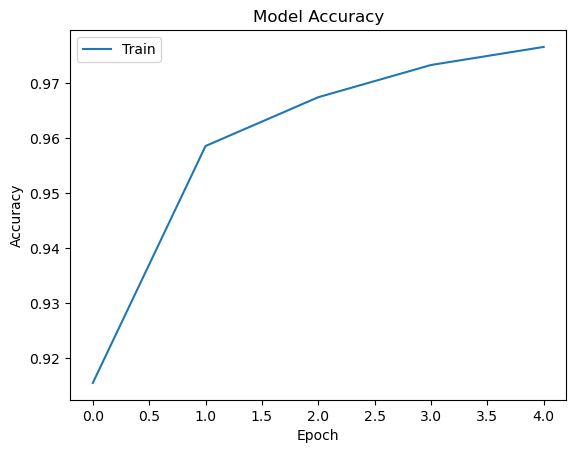

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

Results = model.fit(X_train,
          y_train, 
          epochs=5)

plt.plot(Results.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

model.summary()

## testing the model

In [9]:
model.evaluate(X_test,y_test) 

#epochs=5,optimizer=adam [.06798,0.9803]
#epochs=10 optimizer=adam, [.073, .9804]

313/313 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9750


[0.0836193710565567, 0.9750000238418579]

## saving model to JSON

In [10]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
 #serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
%run serverr.py

2022-11-25 10:49:42.723647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 * Serving Flask app "serverr" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with watchdog (fsevents)
2022-11-25 10:49:52.504703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
 * Debugger is active!
 * Debugger PIN: 692-672-937
127.0.0.1 - - [25/Nov/2022 10:49:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2022 10:49:56] "GET /script.js HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2022 10:49:56] "GET /style.css HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2022 10:50:05] "POST /submit HTTP/1.1" 500 -
Traceback (most recent call last):
  File "/Users/john/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2464, in __call__
    return self.wsgi_app(environ, start_response)
  File "/Users/john/opt/anaconda3/lib/python3.9/site-pack